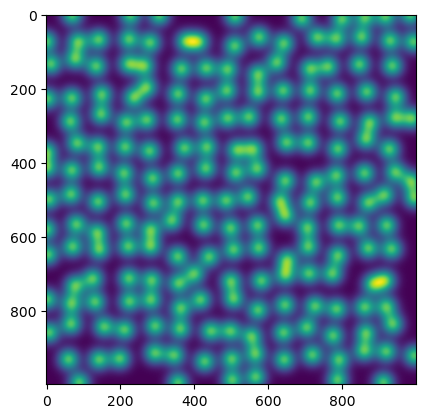

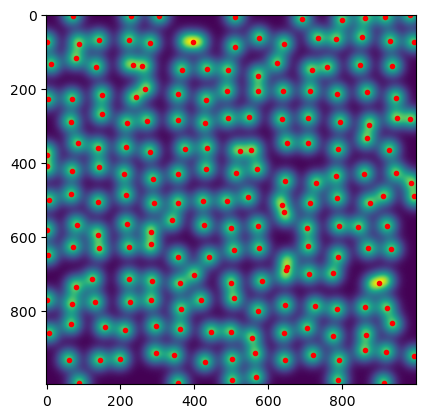

coords_filter.shape =  (80, 2)
117 peak(s) too close to edge
Sampling from 80 peaks
Creating plot...


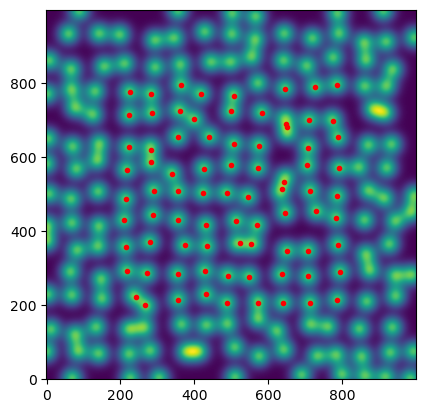

plotting radial average


<Figure size 640x480 with 0 Axes>

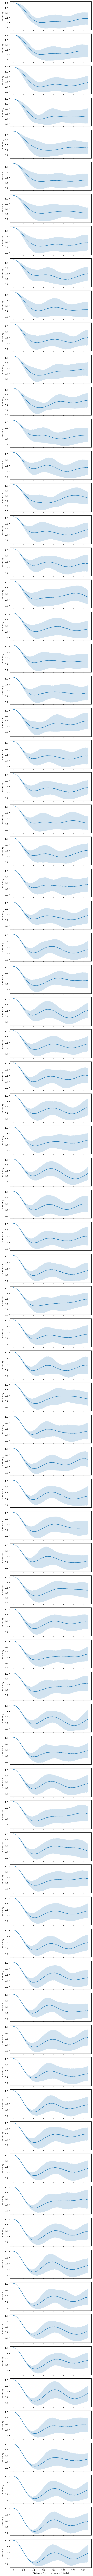

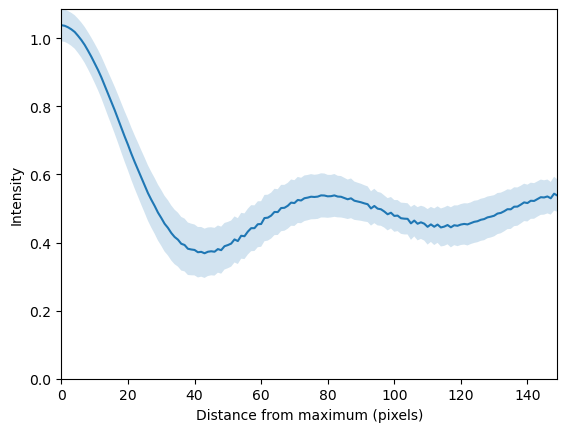

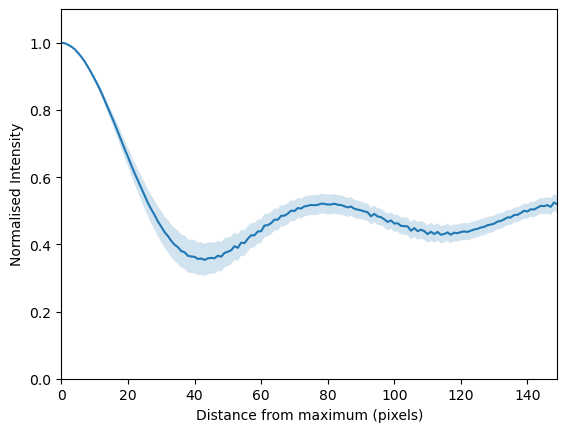

In [1]:
from matplotlib import markers
import numpy as np
import sys, copy, os
from scipy import signal, stats
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from scipy import ndimage as ndi
import pickle
from distributions import GenerateImage, GenerateDistributions

def generate_solid(n, T, imgsize):
    x = np.linspace(0, imgsize-1, n).astype(int)
    y = np.linspace(0, imgsize-1, n).astype(int)

    k1d = signal.gaussian(200, std=20) # returns row vector
    k1d = k1d.reshape(200,1) # reshape k1d into column vector
    kernel = np.outer(k1d,k1d) #generating Gaussian kernel (using outer product)   

    xx, yy = np.meshgrid(x, y)
    i, j = xx.shape
    std = T
    rand_x = np.random.normal(0, scale=std, size=(i,j)).astype(int)
    rand_y = np.random.normal(0, scale=std, size=(i,j)).astype(int)

    xx_rand = xx + rand_x
    yy_rand = yy + rand_y

    cond = (xx_rand<0) | (xx_rand>imgsize-1) | (yy_rand<0) | (yy_rand>imgsize-1)

    cond_r = cond.ravel()
    xx_rand_r = xx_rand.ravel()
    yy_rand_r = yy_rand.ravel()

    xx_rand_r = np.delete(xx_rand_r, np.argwhere(cond_r==True))
    yy_rand_r = np.delete(yy_rand_r, np.argwhere(cond_r==True))

    b = np.zeros((imgsize,imgsize))
    b[xx_rand_r,yy_rand_r] = 1

    img = signal.fftconvolve(b, kernel, mode='same')

    return img

def add_noise(img):
    mean = 0.0
    std = 0.2
    noisyimg = img + np.random.normal(mean,std,img.shape)
    
    return noisyimg

Gen_new_img = False
imgsize = 1000
addnoise = False
filename = 'solid'
n = 15 # number of intervals
T = 10

img = generate_solid(n, T, imgsize)
coords = peak_local_max(img, threshold_abs=0.3)

plt.figure()
plt.imshow(img)
plt.show()

plt.figure()
plt.imshow(img)
plt.plot(coords[:,1],coords[:,0],'r.')
plt.show()

img = img
peaklist = coords
r = 150
dtheta = 1
pl_intensities=False
pl_lines=False
pseudoradav=False
radav=True
pl_pseudoradav = False
pl_radav = True
compare = False
clust_av = True

gen_dists = GenerateDistributions(img,peaklist,r,dtheta,pl_intensities,pl_lines,pseudoradav, pl_pseudoradav, radav, pl_radav, compare, clust_av)


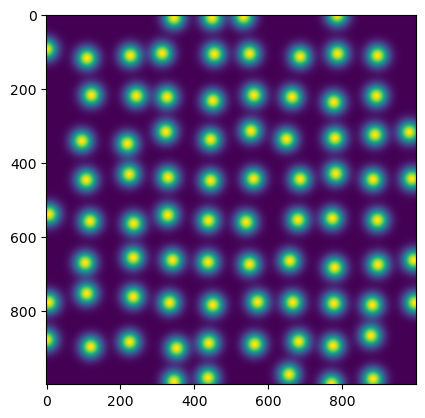

NameError: name 'gen_dists' is not defined

In [2]:
plt.figure()
plt.imshow(img)
plt.show()

print(gen_dists.N_peaks)

In [1]:
y, x = np.indices((gen_dists.img.shape))

r = gen_dists.r
x_img = gen_dists.coords_filter[:,1]
y_img = gen_dists.coords_filter[:,0]
N_peaks = len(x_img)


distmap = np.zeros((N_peaks,2000,2000))

for i in range(N_peaks):
    distmap[i] = np.sqrt((x - x_img[i])**2 + (y - y_img[i])**2)
    
distmap = distmap.astype(int)
mask = (distmap > r)
count = np.count_nonzero(mask[0]==0) #number of pixels within radius

# imgstack = mask.reshape((29, 2000*2000))
# distmap = distmap.reshape((29, 2000*2000))
# mask = mask.reshape((29, 2000*2000))

imgstack = np.tile(gen_dists.img, N_peaks)
distmap = distmap.ravel()
mask = mask.ravel()

distmap = np.delete(distmap, mask)
intensities = np.delete(imgstack, mask)

distmap = distmap.reshape((N_peaks, count))
intensities = intensities.reshape((N_peaks, count))

radialav_list = np.empty([N_peaks,r])
radialstd_list = np.empty([N_peaks,r])

for i in range(N_peaks):
    radialav_list[i], binedges, binnumber = stats.binned_statistic(distmap[i], intensities[i],statistic='mean',bins=r)
    radialstd_list[i], _, _ = stats.binned_statistic(distmap[i], intensities[i], statistic='std',bins=r)

x_radav = np.arange(0,r,1)

dropletmean = np.mean(radialav_list, axis=0)
dropletstd = np.std(radialav_list, axis=0)

plt.figure()
plt.plot(x_radav, dropletmean)
plt.fill_between(x_radav, dropletmean-dropletstd, dropletmean+dropletstd, alpha=0.2)
plt.show()



















NameError: name 'np' is not defined